<a href="https://colab.research.google.com/github/zainabhameed24/Zainab-Hameed_Intership_of_Developer-_Hub_Corporations_Tasks/blob/main/Internship_Task_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Credit Risk Prediction**
**Objective:**
Predict whether a loan applicant is likely to default on a loan.

**Dataset:**
Loan Prediction Dataset

In [ ]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")
print(df.head(2))
print(df.info)

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate      

Handle missing data appropriately.

In [ ]:
# Check missing values
print(df.isnull().sum())

# Impute categorical with mode, numerical with median
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

# Fill categorical
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


/tmp/ipython-input-1138982897.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1138982897.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

● Visualize key features such as loan amount, education, and income.

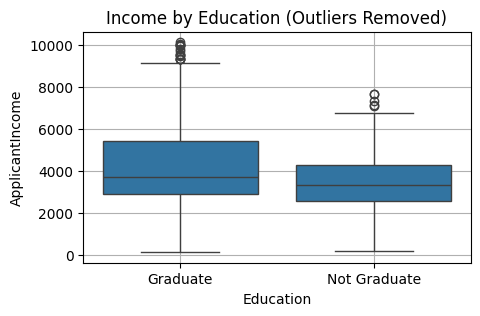

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

# Plot boxplot without outliers
plt.figure(figsize=(5, 3))
sns.boxplot(x='Education', y='ApplicantIncome', data=df_no_outliers)
plt.title('Income by Education (Outliers Removed)')
plt.grid(True)
plt.show()

**Explantion**

The boxplot compares the distribution of applicant income between graduates and non-graduates, showing that graduates tend to have higher incomes. The median income for graduates is higher than that of non-graduates. The interquartile range (IQR) is also wider for graduates, indicating greater variability in their incomes.

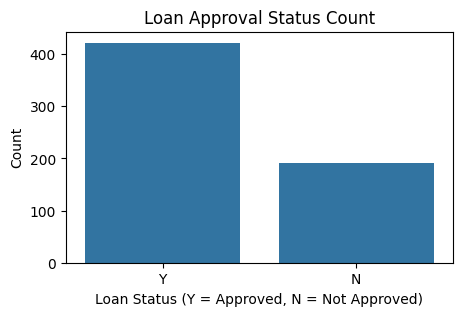

In [ ]:
# Loan Status Count
#Shows overall distribution of approved vs. rejected loans.
plt.figure(figsize=(5, 3))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status Count')
plt.xlabel('Loan Status (Y = Approved, N = Not Approved)')
plt.ylabel('Count')
plt.show()

**Explanation**

The total number of loan applications is 580 (or very close to it, given the approximation from the graph). However, the provided table snippet contains 614 rows (from 0 to 613), indicating that there are actually 614 loan applications in the dataset. The discrepancy between the count from the graph (580) and the count from the table (614) may be due to the approximation of values from the graph. Therefore, based on the table data, the correct total number of loan applications is 614.




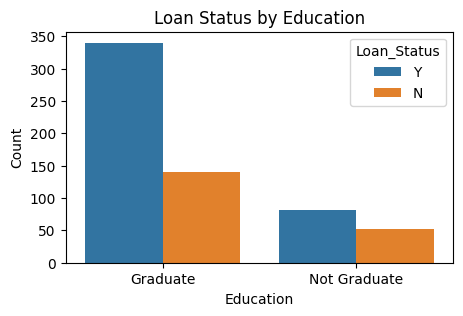

In [ ]:
#Loan Status by Education
#Helps see how education impacts loan approval.
plt.figure(figsize=(5, 3))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

**Explanation:**

The dataset contains 614 loan applications with various attributes such as Loan_ID, Gender, Married, Dependents, Education, and Self_Employed. The bar graph shows that graduates have a higher count of approved loans (Y) compared to non-graduates. The data suggests a positive correlation between education level and loan approval status.

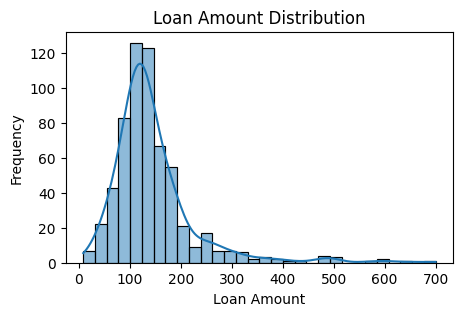

In [ ]:
#Loan Amount Distribution
#Shows how loan amounts are distributed.
plt.figure(figsize=(5, 3))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

**Exlanation**
The histogram illustrates the distribution of loan amounts, showing a positively skewed curve with most loans falling between 0 and 200. The frequency peaks around 100-150, indicating a high concentration of loans within this range. The data may be used to analyze the relationship between these attributes and loan amounts

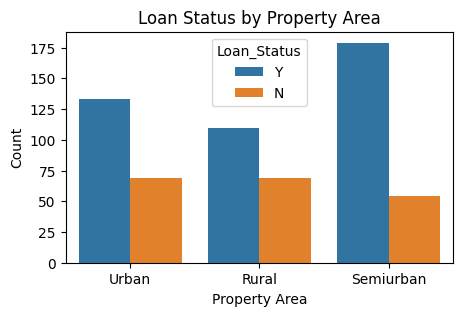

In [ ]:
#Loan Status by Property Area
#Explore if loan approval depends on location.
plt.figure(figsize=(5, 3))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

**Explanation**: The bar chart shows loan status distribution across Urban, Rural, and Semiurban property areas. The Semiurban area has the highest number of approved loans, at around 175. In contrast, Urban and Rural areas have approximately 135 and 110 approved loans, respectively. The number of not approved loans is relatively consistent across Urban and Rural areas, at around 70. Semiurban areas have the lowest number of not approved loans, at approximately 50.

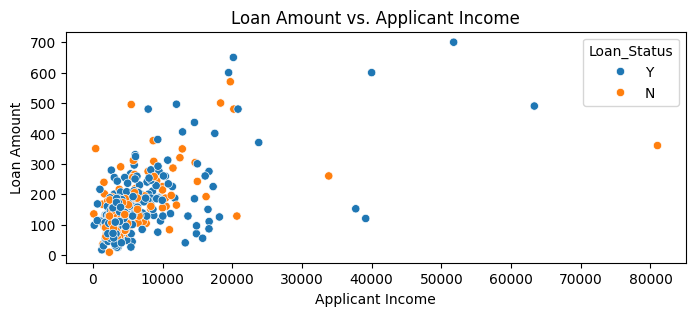

In [ ]:
#Loan Amount vs. Applicant Income
#Check relationship between income and loan size.
plt.figure(figsize=(8, 3))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

**Explanation**

This scatter plot shows the relationship between Applicant Income and Loan Amount, colored by Loan Status (Y = approved, N = not approved). Most applicants fall under 20,000 income and 300 loan amount, with both approvals and rejections mixed. Higher incomes don’t always lead to higher loan approval — approvals happen across all income levels.

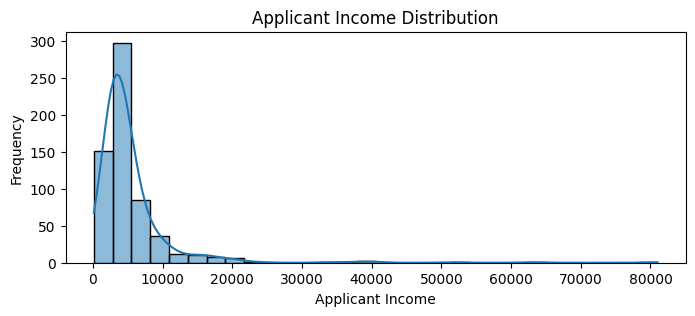

In [ ]:
# Applicant Income Distribution
#Understand the spread of applicant income.
plt.figure(figsize=(8, 3))
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

**Explanation**

The histogram shows that most applicants have incomes between 2,000 and 10,000, with a peak around 3,000–5,000. The distribution is right-skewed, meaning a few people earn much higher but are rare. This skew can affect model performance, so a log transformation is often used to fix it.

Train a classification model like Logistic Regression or Decision Tree.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#  Encode categorical columns
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

#  Define X and y
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Features
y = df['Loan_Status']                            # Target

#  Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train model
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=102)
model.fit(X_train, y_train)

#  Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



**Explanation**

The model is 78% accurate, predicting most results correctly. It does very well on "Yes" cases (97% recall) but misses many "No" cases (only 42% recall). This means the model is biased toward predicting "Yes", likely due to more "Yes" samples in the data.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# y_test = actual labels
# y_pred = predicted labels by the model

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Confusion Matrix:
 [[18 25]
 [ 2 78]]
Accuracy: 0.7804878048780488


**Explanation**

The confusion matrix shows: 18 "No" were correctly predicted, 25 "No" were wrongly predicted as "Yes". 78 "Yes" were correctly predicted, only 2 "Yes" were wrongly predicted as "No". Overall, the model is good at predicting "Yes", but often confuses "No" as "Yes", leading to 78% accuracy.